# Visualization Tool

In this notebook, we will explore the data used for predicting patient outcomes and create visualizations to gain a better understanding of the data.

## Data Exploration

We will start by loading the data and performing some exploratory data analysis (EDA). We will use the pandas library to load the data into a DataFrame and matplotlib and seaborn libraries to create visualizations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
data = pd.read_csv("../data/processed/merged_data.csv")

# Show the first five rows of the DataFrame
print(data.head())

   patient_id  age     sex ethnicity  diabetes  hypertension  heart_disease  \
0           1   71    Male     Black         1             0              0   
1           2   34  Female     White         0             1              0   
2           3   80    Male     Asian         1             1              0   
3           4   40  Female     Black         0             0              0   
4           5   43    Male     Black         0             0              0   

   kidney_disease treatment_type  dosage_mg  duration_days  outcome  
0               0              A         58              5        0  
1               0              A        158              6        0  
2               0              A         83             27        1  
3               0              B         14             49        0  
4               0              A        109             40        0  


The output should show the first five rows of the DataFrame, which should include the patient data:

We can use the `describe()` method to obtain basic statistics about the data:

In [ ]:
# Show basic statistics about the data
print(data.describe())

The output should show basic statistics about the data, including the count, mean, standard deviation, minimum, and maximum values for each column.

## Data Visualization

Next, we will create some visualizations to gain a better understanding of the data. We will use seaborn to create histograms and box plots to visualize the distribution of the data.

In [ ]:
# Create a histogram of patient ages
sns.histplot(data["age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Create a box plot of patient BMIs
sns.boxplot(data["bmi"])
plt.xlabel("BMI")
plt.show()

# Create a box plot of patient outcomes by sex
sns.boxplot(x="sex", y="outcome", data=data)
plt.xlabel("Sex")
plt.ylabel("Outcome")
plt.show()

The output should show three visualizations: a histogram of patient ages, a box plot of patient BMIs, and a box plot of patient outcomes by sex.

## Conclusion

In this notebook, we explored the data used for predicting patient outcomes and created visualizations to gain a better understanding of the data. By visualizing the data, we can identify patterns and relationships that may be useful for predicting patient outcomes. These visualizations can also be used to communicate our findings to stakeholders and other members of the healthcare team.

In [5]:
import os
print(os.getcwd())


c:\Users\hp\Outcomes-of-Predictive-Healthcare-Analytics-Modeling-Patient\predictive-healthcare-analytics\reports


In [7]:
import os
print(os.listdir("../data/processed"))


['cleaned_data.csv', 'merged_data.csv']


   age   bmi     sex   bp  diabetes  cholesterol  heart_rate treatment_type  \
0   71  26.9  Female  176         1          206          71              B   
1   34  30.6  Female  115         0          215         113              C   
2   80  34.3  Female  135         0          223          80              C   
3   40  34.9  Female  118         0          247         113              B   
4   43  36.1  Female   93         1          293          70              A   

   outcome  
0        1  
1        0  
2        0  
3        0  
4        1  


Summary Statistics:
               age         bmi   sex          bp    diabetes  cholesterol  \
count   500.000000  500.000000   500  500.000000  500.000000   500.000000   
unique         NaN         NaN     2         NaN         NaN          NaN   
top            NaN         NaN  Male         NaN         NaN          NaN   
freq           NaN         NaN   264         NaN         NaN          NaN   
mean     54.272000   29.219400   NaN  13

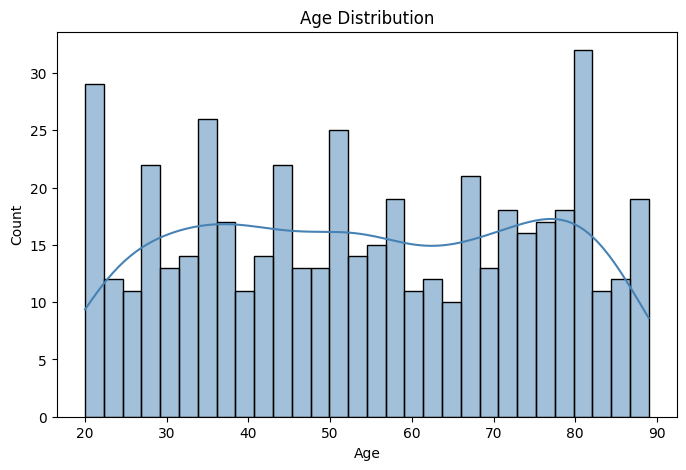

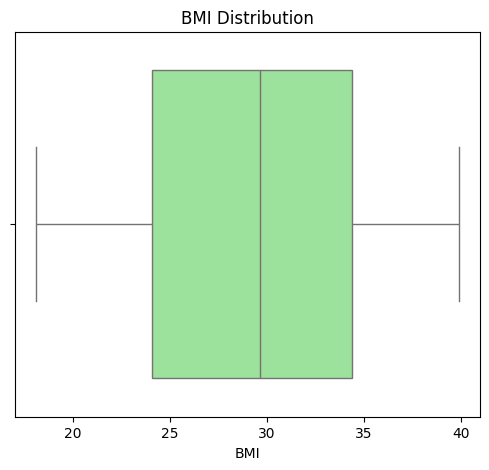

C:\Users\hp\AppData\Local\Temp\ipykernel_26836\3830311143.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="outcome", data=data, palette="Set2")


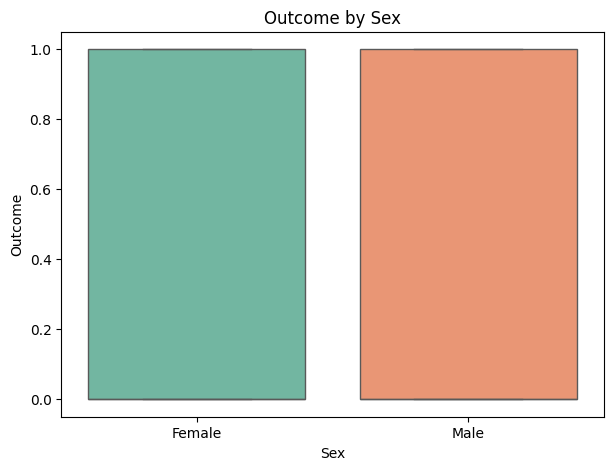

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset (correct folder structure)
data = pd.read_csv("../data/processed/cleaned_data.csv")

# Preview data
print(data.head())
print("\n\nSummary Statistics:")
print(data.describe(include='all'))

# ----------------------------
# Visualization 1: Age Histogram
# ----------------------------
plt.figure(figsize=(8,5))
sns.histplot(data["age"], bins=30, kde=True, color="steelblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ----------------------------
# Visualization 2: BMI Box Plot
# ----------------------------
plt.figure(figsize=(6,5))
sns.boxplot(x=data["bmi"], color="lightgreen")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()

# ----------------------------
# Visualization 3: Outcome by Sex Box Plot
# ----------------------------
plt.figure(figsize=(7,5))
sns.boxplot(x="sex", y="outcome", data=data, palette="Set2")
plt.title("Outcome by Sex")
plt.xlabel("Sex")
plt.ylabel("Outcome")
plt.show()


Loaded: ../data/processed/merged_data.csv
   patient_id  age     sex ethnicity  diabetes  hypertension  heart_disease  \
0           1   71    Male     Black         1             0              0   
1           2   34  Female     White         0             1              0   
2           3   80    Male     Asian         1             1              0   
3           4   40  Female     Black         0             0              0   
4           5   43    Male     Black         0             0              0   

   kidney_disease treatment_type  dosage_mg  duration_days  outcome  
0               0              A         58              5        0  
1               0              A        158              6        0  
2               0              A         83             27        1  
3               0              B         14             49        0  
4               0              A        109             40        0  

Summary statistics:
         patient_id         age     sex et

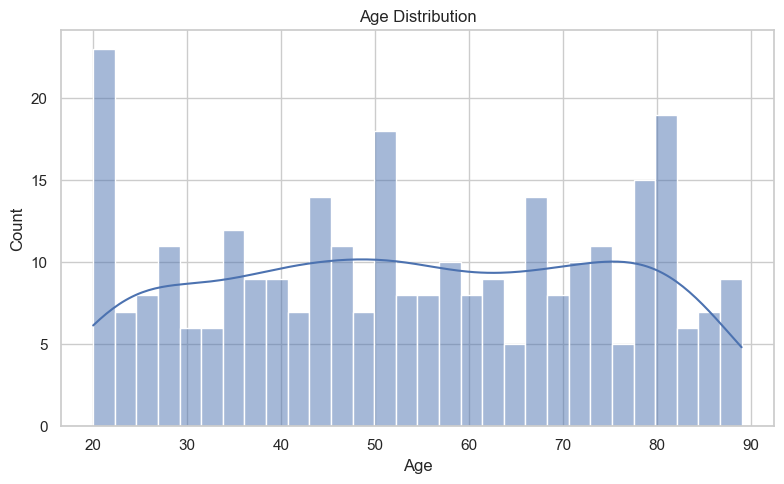

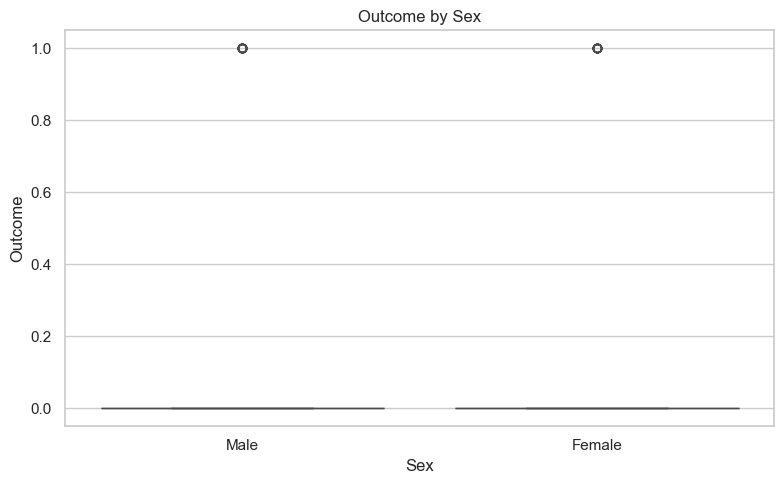

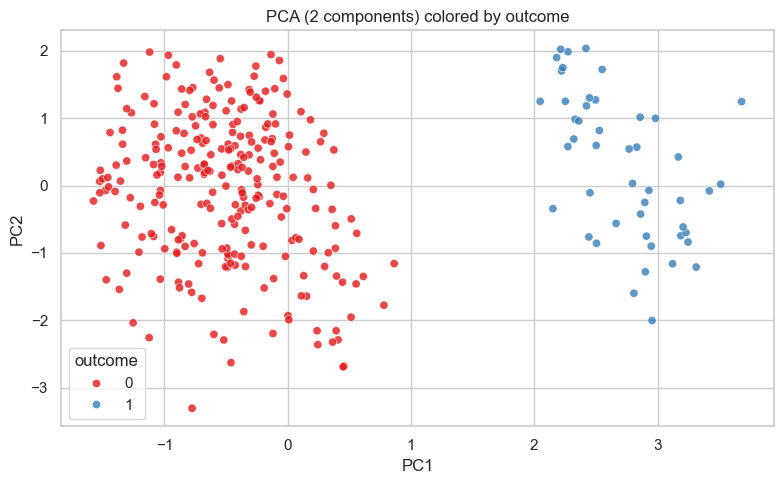

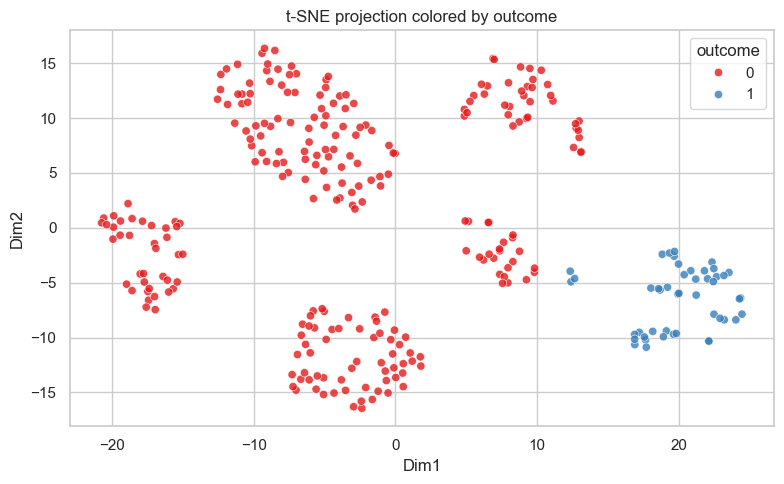

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# load dataset (try merged, fallback to cleaned)
base_paths = [
    "../data/processed/merged_data.csv",
    "../data/processed/cleaned_data.csv",
    "../data/merged_data.csv",
    "../data/cleaned_data.csv"
]

data = None
for p in base_paths:
    if os.path.exists(p):
        data = pd.read_csv(p)
        print(f"Loaded: {p}")
        break

if data is None:
    raise FileNotFoundError("No dataset found. Expected one of: " + ", ".join(base_paths))

# quick preview
print(data.head())
print("\nSummary statistics:\n", data.describe(include="all"))

# ensure outcome column is numeric
if "outcome" in data.columns:
    data["outcome"] = pd.to_numeric(data["outcome"], errors="coerce").fillna(0).astype(int)

# -----------------------
# Basic visualizations
# -----------------------

# Age distribution
plt.figure()
sns.histplot(data["age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# BMI distribution (if present)
if "bmi" in data.columns:
    plt.figure()
    sns.boxplot(x=data["bmi"].dropna())
    plt.title("BMI Distribution")
    plt.xlabel("BMI")
    plt.tight_layout()
    plt.show()

# Outcome by sex
if {"sex", "outcome"}.issubset(set(data.columns)):
    plt.figure()
    sns.boxplot(x="sex", y="outcome", data=data)
    plt.title("Outcome by Sex")
    plt.xlabel("Sex")
    plt.ylabel("Outcome")
    plt.tight_layout()
    plt.show()

# -----------------------
# PCA and t-SNE visualizations
# -----------------------

# select numeric features for dimensionality reduction
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# drop id-like columns if present
numeric_cols = [c for c in numeric_cols if not c.lower().endswith("id")]

if len(numeric_cols) >= 2:
    X = data[numeric_cols].fillna(data[numeric_cols].median())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA (2 components)
    pca = PCA(n_components=2, random_state=42)
    pca_proj = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(pca_proj, columns=["PC1", "PC2"])
    if "outcome" in data.columns:
        pca_df["outcome"] = data["outcome"].values
    else:
        pca_df["outcome"] = 0

    plt.figure()
    sns.scatterplot(x="PC1", y="PC2", hue="outcome", palette="Set1", data=pca_df, alpha=0.8)
    plt.title("PCA (2 components) colored by outcome")
    plt.tight_layout()
    plt.show()

    # t-SNE (sample if large)
    tsne_sample_size = 3000
    n_samples = X_scaled.shape[0]
    if n_samples > tsne_sample_size:
        idx = np.random.choice(n_samples, tsne_sample_size, replace=False)
        X_tsne = X_scaled[idx]
        y_tsne = data["outcome"].values[idx] if "outcome" in data.columns else None
    else:
        X_tsne = X_scaled
        y_tsne = data["outcome"].values if "outcome" in data.columns else None

    tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="pca")
    tsne_proj = tsne.fit_transform(X_tsne)
    tsne_df = pd.DataFrame(tsne_proj, columns=["Dim1", "Dim2"])
    if y_tsne is not None:
        tsne_df["outcome"] = y_tsne
    else:
        tsne_df["outcome"] = 0

    plt.figure()
    sns.scatterplot(x="Dim1", y="Dim2", hue="outcome", palette="Set1", data=tsne_df, alpha=0.8)
    plt.title("t-SNE projection colored by outcome")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for PCA/t-SNE. Numeric columns found:", numeric_cols)
